In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.3/978.3 kB 10.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import jarque_bera
#from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from arch.unitroot import DFGLS

Ejercicio 1:
Sean 𝑋𝑖 distr 𝑁(𝜇𝑖, 𝜎𝑖<sup>2</sup>),𝑖 = 1,2, donde 𝑋1 distr 𝑁(−0.49 , 0.49) 𝑦 𝑋2 distr 𝑁(0, 4) son dos variables aleatorias con distribución normal. Usted decide mezclarlas con pesos 0.25 y 0.75 respectivamente. De modo que la función de densidad (pdf) de la mixtura será

𝑓(𝑥) = 0.25𝜑1(𝑥) + 0.75𝜑2(𝑥),
donde

𝜑1(𝑥) =1√0.98𝜋𝑒−(𝑥+0.49)20.98

y donde

𝜑2(𝑥) =1√8𝜋𝑒−(𝑥)28

a. Usando Excel, grafique la pdf de la mixtura para valores del soporte de la variable aleatoria entre -10 y 10 con deltas de 0,1.

b. Solamente observando el gráfico, ¿puede afirmar si esta mixtura es asimétrica? Explique.

c. Calcule la media, la varianza, el coeficiente de asimetría y el de curtosis de la mixtura. Recuerde que esto requiere calcular varios momentos de la variable aleatoria, que, en definitiva, son integrales.

d. ¿Es la mixtura leptocúrtica? Responda en función al valor que obtuvo en el inciso anterior y además muestre en un gráfico en Excel la pdf de la mixtura del gráfico anterior y la pdf de una normal con la misma media y varianza que la mixtura.

e. Genere 2000 valores aleatorios de esta mixtura y úselos para graficar un QQ-Plot. Muestre qué valores usó y el QQ-plot.

1 a:


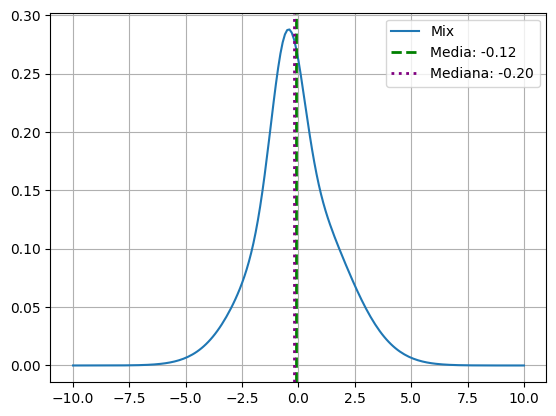

1 b:
Sí, mediante el gráfico se puede observar que hay asimetría. Además, como la mediana es mas chica que la media, la asimetría es positiva.

1 c:
Media de la mixtura: -0.1225
Varianza de la mixtura: 3.1675
Desviación estándar de la mixtura: 1.7798
Coeficiente de asimetría: 0.1697
Coeficiente de curtosis: 0.6433

1 d:
Sí, la mixtura es leptocúrtica, ya que la curtosis (0.6433) es mayor a 0.



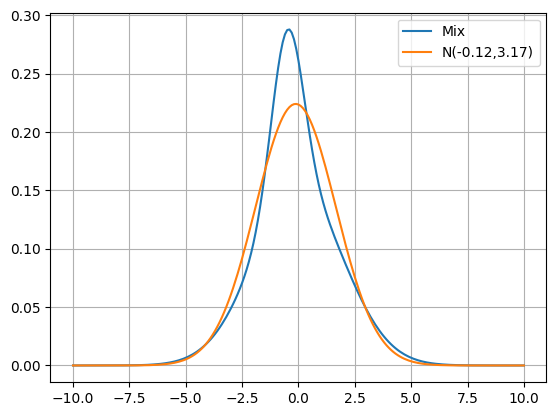

In [ ]:
def calc_mu_mixtura(w1, w2, mu1, mu2):
  return w1 * mu1 + w2 * mu2

def calc_var_mixtura(w1, w2, mu1, mu2, sigma1, sigma2):
  mu_mix = calc_mu_mixtura(w1, w2, mu1, mu2)
  return w1 * (sigma1**2 + (mu1 - mu_mix)**2) + w2 * (sigma2**2 + (mu2 -mu_mix)**2)

def calc_skewness(w1, w2, mu1, mu2, sigma1, sigma2):
  mu_mixtura = calc_mu_mixtura(w1, w2, mu1, mu2)
  E3_mixtura = w1 * (3 * (mu1 - mu_mixtura) * sigma1**2 + (mu1 - mu_mixtura)**3) + \
             w2 * (3 * (mu2 - mu_mixtura) * sigma2**2 + (mu2 - mu_mixtura)**3)
  sigma_mixtura = np.sqrt(calc_var_mixtura(w1, w2, mu1, mu2, sigma1, sigma2))
  return E3_mixtura / (sigma_mixtura**3)

def calc_kurtosis(w1, w2, mu1, mu2, sigma1, sigma2):
  mu_mixtura = calc_mu_mixtura(w1, w2, mu1, mu2)
  E4_mixtura = w1 * (3 * sigma1**4 + 6 * (mu1 - mu_mixtura)**2 * sigma1**2 + (mu1 - mu_mixtura)**4) + \
              w2 * (3 * sigma2**4 + 6 * (mu2 - mu_mixtura)**2 * sigma2**2 + (mu2 - mu_mixtura)**4)
  return E4_mixtura / (sigma_mixtura**4) - 3

r = 10
s = 0.1
v = np.arange(-1*r,r + s, s)
ns = [(-0.49, 0.49, 0.25),(0,4, 0.75)]
nn = []
for ni in ns:
  nn.append(ni[2]*stats.norm.pdf(v,loc=ni[0],scale=np.sqrt(ni[1])))
mix = sum(nn)

# normalizar mezcla (para que integre a 1)
mix_norm = mix / np.trapezoid(mix, v)

# media = integral x*f(x) dx
media = np.trapezoid(v * mix_norm, v)

# mediana = punto donde CDF cruza 0.5
cdf = np.cumsum(mix_norm) * (v[1] - v[0])
mediana = v[np.searchsorted(cdf, 0.5)]

print("1 a:")
plt.plot(v, mix, label='Mix')
plt.axvline(media, color="green", linestyle="--", linewidth=2, label=f"Media: {media:.2f}")
plt.axvline(mediana, color="purple", linestyle=":", linewidth=2, label=f"Mediana: {mediana:.2f}")
plt.legend()
plt.grid(True)
plt.show()

print('1 b:\nSí, mediante el gráfico se puede observar que hay asimetría. Además, como la mediana es mas chica que la media, la asimetría es positiva.\n')

print("1 c:")
mu_mixtura = calc_mu_mixtura(ns[0][2], ns[1][2], ns[0][0], ns[1][0])
print(f"Media de la mixtura: {mu_mixtura:.4f}")

sigma_sq_mixtura = calc_var_mixtura(ns[0][2], ns[1][2], ns[0][0], ns[1][0], np.sqrt(ns[0][1]), np.sqrt(ns[1][1]))
print(f"Varianza de la mixtura: {sigma_sq_mixtura:.4f}")

sigma_mixtura = np.sqrt(sigma_sq_mixtura)
print(f"Desviación estándar de la mixtura: {sigma_mixtura:.4f}")

asimetria = calc_skewness(ns[0][2], ns[1][2], ns[0][0], ns[1][0], np.sqrt(ns[0][1]), np.sqrt(ns[1][1]))
print(f"Coeficiente de asimetría: {asimetria:.4f}")

curtosis = calc_kurtosis(ns[0][2], ns[1][2], ns[0][0], ns[1][0], np.sqrt(ns[0][1]), np.sqrt(ns[1][1]))
print(f"Coeficiente de curtosis: {curtosis:.4f}")

print(f'\n1 d:\nSí, la mixtura es leptocúrtica, ya que la curtosis ({curtosis:.4f}) es mayor a 0.\n')
plt.plot(v, mix, label='Mix')
plt.plot(v, stats.norm.pdf(v,loc=mu_mixtura,scale=sigma_mixtura), label=f'N({mu_mixtura:.2f},{sigma_sq_mixtura:.2f})')
plt.legend()
plt.grid(True)
plt.show()

Ejercicio 2: (35 puntos) La base de datos MIA103_Final_Ejer_2_250823.dta contiene
datos mensuales de tipo de cambio real de Argentina (RBER_AR) para el periodo Enero
2010 a Diciembre 2020, como también el desvío estándar del tipo de cambio real de
Argentina (RBER_AR_sd6) calculado sobre las últimas 6 observaciones (la
contemporánea y los 5 meses anteriores). Los datos son oficiales y la fuente es BIS.
Aclaración: un aumento del RBER_AR indica una apreciación del tipo de cambio real.
a) Muestre un gráfico de las series de tiempo
b) ¿Cuál es el orden de integración de estas dos series de tiempo?
c) Estime un modelo VAR. Si alguna de las series presenta una tendencia
determinística, remuévala previamente. En base al VAR estimado, ¿alguna de las
variables causa en sentido de Granger a la otra?

In [ ]:
df = pd.read_stata("MIA103_Final_Ejer_2_250823.dta")
df = df.dropna()
df['t'] = pd.to_datetime(df['t'])
df = df.sort_values('t')
df.head()

,RBER_AR,RBER_AR_sd6,t
0,98.870003,1.225477,2010-01-01
1,100.620003,1.976474,2010-02-01
2,99.820000,2.138749,2010-03-01
3,99.349998,1.786254,2010-04-01
4,102.059998,1.618118,2010-05-01


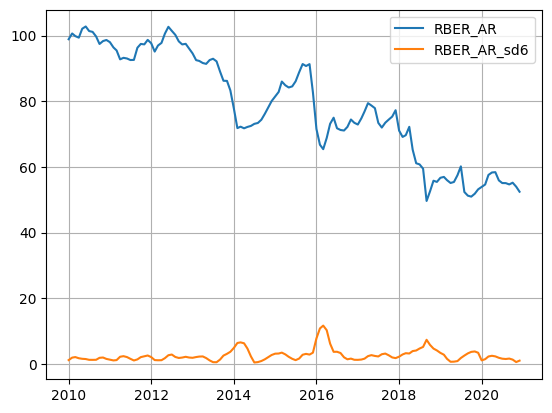

In [ ]:
plt.figure()
plt.plot(df['t'], df['RBER_AR'], label='RBER_AR')
plt.plot(df['t'], df['RBER_AR_sd6'], label='RBER_AR_sd6')
plt.grid(True)
plt.legend()
plt.show()

In [41]:
def removeDeterministicTrend(series: pd.Series) -> pd.Series:
    clean = series.dropna()
    t = np.arange(len(clean))

    # X has intercept (alpha) and trend
    X = sm.add_constant(t, prepend=True)  # first column = alpha, second = trend

    # Fit OLS of y ~ alpha + beta * t
    model = sm.OLS(clean.values, X).fit()

    # Residuals = detrended series
    resid = pd.Series(model.resid, index=clean.index, name=series.name)

    # Optional: return also the estimated alpha and beta
    resid.alpha = model.params[0]
    resid.beta = model.params[1]

    return resid + resid.alpha

print("tipo de cambio real")
test = DFGLS(df["RBER_AR"], trend="c")
print(test.summary())

print("tipo de cambio real")
test2 = DFGLS(df["RBER_AR"], trend="ct")
print(test2.summary())

'''
RBER_AR es I(0) con tendencia deterministica
'''

df["RBER_AR_detrended"] = removeDeterministicTrend(df["RBER_AR"])

test = DFGLS(df["RBER_AR_sd6"], trend="c")
print(test.summary())
'''
RBER_AR_sd6 es I(0)
'''

model = VAR(df[["RBER_AR_detrended", "RBER_AR_sd6"]].dropna())
selectOrder = model.select_order(maxlags=24,trend="c")
print(selectOrder.summary())

result_var = model.fit(selectOrder.bic)
print(f"\nVAR({selectOrder.bic}):\n {result_var.summary()}")

isStable = result_var.is_stable()
print(f"\nVAR({selectOrder.bic}) Estabilidad: {isStable}")

'''es lo mismo que hacer'''
# roots = result_var.roots
# print("Raíces del VAR(2):")
# print(np.abs(roots))  # quiero que sean mayores a 1

whiteness_test = result_var.test_whiteness(nlags=12)
print(whiteness_test.summary())

print('''  Los ruidos blancos estan autocorrelacionados ''')

print(''' Elijo una mayor cantidad de lags: 10 ''')

lags = 10
result_var2 = model.fit(lags)
print(f"\nVAR({lags}):\n {result_var2.summary()}")

isStable = result_var2.is_stable()
print(f"\nVAR({lags}) Estabilidad: {isStable}")


whiteness_test = result_var2.test_whiteness(nlags=lags * 2)
print(whiteness_test.summary())

print('''  Los ruidos blancos NO estan autocorrelacionados\n''')

from statsmodels.stats.diagnostic import het_arch
resid = result_var2.resid  # DataFrame con los residuos del VAR

for col in resid.columns:
    arch_test = het_arch(resid[col], nlags=10)
    print(f"{col}: LM stat = {arch_test[0]:.3f}, p-value = {arch_test[1]:.3f}")


print(f'''
(H0): los residuos son homocedásticos (varianza constante)
(H1) es que hay heterocedasticidad.
Cuando los p-values son mayores que alpha, no se rechaza H0.
''')

print(f"\nVAR({lags}): Los residuos son homocedasticos.\n")

print(f"\nVAR({lags}): es un buen modelo, puedo usarlo para testear causalidad de Granger.\n")


print(result_var2.test_causality("RBER_AR_detrended", ["RBER_AR_sd6"], kind="f"))
print('''\nHipótesis nula (H₀): RBER_AR_sd6 no Granger-causa RBER_AR_detrended.
Como p-value = 0.518 > 0.05 y test statistic < critical value, no rechazamos H₀.
Conclusión: RBER_AR_sd6 no proporciona información útil para predecir RBER_AR_detrended.\n''')

print(result_var2.test_causality("RBER_AR_sd6", ["RBER_AR_detrended"], kind="f"))

print('''\nHipótesis nula (H₀): RBER_AR_detrended no Granger-causa RBER_AR_sd6.
Como p-value = 0.000 < 0.05 y test statistic > critical value, rechazamos H₀.
Conclusión: RBER_AR_detrended sí Granger-causa RBER_AR_sd6.\n''')

tipo de cambio real
      Dickey-Fuller GLS Results      
Test Statistic                  0.108
P-value                         0.729
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -2.72 (1%), -2.10 (5%), -1.78 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
tipo de cambio real
      Dickey-Fuller GLS Results      
Test Statistic                 -3.470
P-value                         0.009
Lags                                1
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.57 (1%), -2.99 (5%), -2.70 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
      Dickey-Fuller GLS Results      
Test Statistic                 -3.505
P-value                         0.001
Lags                                2
-------------------------------------

Trend: Co